**INSTALL PACKAGES AND IMPORT THEM**

In [1]:

# !pip3 install pandas
# !pip3 install numpy
# !pip3 install matplotlib
# !pip3 install seaborn
# !pip3 install scikit-learn
# !pip3 install yellowbrick

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick


**LOAD DATA**

In [3]:
def load_data():
  global df
  try: 
    df = pd.read_csv("../data/smoking.csv")
  except FileNotFoundError:
    from google.colab import drive
    drive.mount('/content/drive')
    df=pd.read_csv('/content/drive/MyDrive/MD/Laboratori/Practica 2/data/smoking.csv')

In [4]:
load_data()


In [5]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


**DESCRIPTIVE ANALYSIS BEFORE ANY TRANSFORMATION**

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,55692.0,NaN,NaN,NaN,27845.5,16077.039933,0.0,13922.75,27845.5,41768.25,55691.0
gender,55692,2,M,35401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,55692.0,NaN,NaN,NaN,44.182917,12.071418,20.0,40.0,40.0,55.0,85.0
height(cm),55692.0,NaN,NaN,NaN,164.649321,9.194597,130.0,160.0,165.0,170.0,190.0
weight(kg),55692.0,NaN,NaN,NaN,65.864936,12.820306,30.0,55.0,65.0,75.0,135.0
waist(cm),55692.0,NaN,NaN,NaN,82.046418,9.274223,51.0,76.0,82.0,88.0,129.0
eyesight(left),55692.0,NaN,NaN,NaN,1.012623,0.486873,0.1,0.8,1.0,1.2,9.9
eyesight(right),55692.0,NaN,NaN,NaN,1.007443,0.485964,0.1,0.8,1.0,1.2,9.9
hearing(left),55692.0,NaN,NaN,NaN,1.025587,0.157902,1.0,1.0,1.0,1.0,2.0
hearing(right),55692.0,NaN,NaN,NaN,1.026144,0.159564,1.0,1.0,1.0,1.0,2.0


In [7]:
# Drop columns ID and oral because they are uninformative

df.drop(columns=['ID', 'oral'], axis=1, inplace=True)


In [8]:
# Transforming gender and tartar columns to binary columns
df['gender'] = (df['gender'] == 'M').astype(bool)
df['tartar'] = (df['tartar'] == 'Y').astype(bool)

In [9]:
print(df['gender'].value_counts())
print(df['tartar'].value_counts())
df.dtypes


gender
True     35401
False    20291
Name: count, dtype: int64
tartar
True     30940
False    24752
Name: count, dtype: int64


gender                    bool
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries            int64
tartar                    bool
smoking                  int64
dtype: object

In [10]:
df.isna().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [11]:
# Correlation matrix
df.corr()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
gender,1.000000,-0.290095,0.741556,0.574956,0.419568,0.127424,0.125680,-0.009407,-0.011579,0.167289,...,-0.042525,0.702214,0.015907,0.507249,0.095718,0.167903,0.237270,0.084408,0.055473,0.510340
age,-0.290095,1.000000,-0.479528,-0.324706,-0.026297,-0.195472,-0.192723,0.203993,0.208722,0.134023,...,0.043007,-0.263078,0.029625,-0.106118,0.032576,-0.063937,0.013031,-0.114984,-0.081796,-0.162557
height(cm),0.741556,-0.479528,1.000000,0.675656,0.378902,0.151133,0.155665,-0.078663,-0.078323,0.080585,...,-0.048419,0.539367,0.005128,0.383883,0.041737,0.126511,0.139720,0.079331,0.055513,0.396675
weight(kg),0.574956,-0.324706,0.675656,1.000000,0.822842,0.108433,0.113155,-0.050094,-0.052836,0.266131,...,0.040560,0.492970,0.032566,0.324808,0.120130,0.250634,0.209625,0.073536,0.059921,0.302780
waist(cm),0.419568,-0.026297,0.378902,0.822842,1.000000,0.027458,0.037996,0.023790,0.019286,0.316922,...,0.072817,0.387066,0.045492,0.235024,0.142690,0.252478,0.243141,0.044203,0.046197,0.226259
eyesight(left),0.127424,-0.195472,0.151133,0.108433,0.027458,1.000000,0.354574,-0.046571,-0.048788,-0.019330,...,-0.007257,0.095234,-0.002752,0.071410,-0.007966,0.019326,0.003850,0.003684,0.012532,0.061204
eyesight(right),0.125680,-0.192723,0.155665,0.113155,0.037996,0.354574,1.000000,-0.043877,-0.046623,-0.013720,...,-0.006172,0.096119,-0.013511,0.047608,-0.006921,0.024182,0.012195,0.016359,0.006568,0.063017
hearing(left),-0.009407,0.203993,-0.078663,-0.050094,0.023790,-0.046571,-0.043877,1.000000,0.510095,0.055219,...,-0.016706,-0.026116,0.014527,0.003349,0.018074,0.004820,0.012864,-0.016100,-0.035396,-0.023209
hearing(right),-0.011579,0.208722,-0.078323,-0.052836,0.019286,-0.048788,-0.046623,0.510095,1.000000,0.049095,...,-0.015426,-0.030943,0.019461,0.008060,0.009393,-0.005081,0.009245,-0.016376,-0.026698,-0.018855
systolic,0.167289,0.134023,0.080585,0.266131,0.316922,-0.019330,-0.013720,0.055219,0.049095,1.000000,...,0.016569,0.186514,0.046170,0.072288,0.083204,0.094893,0.165724,0.029894,0.006542,0.073109


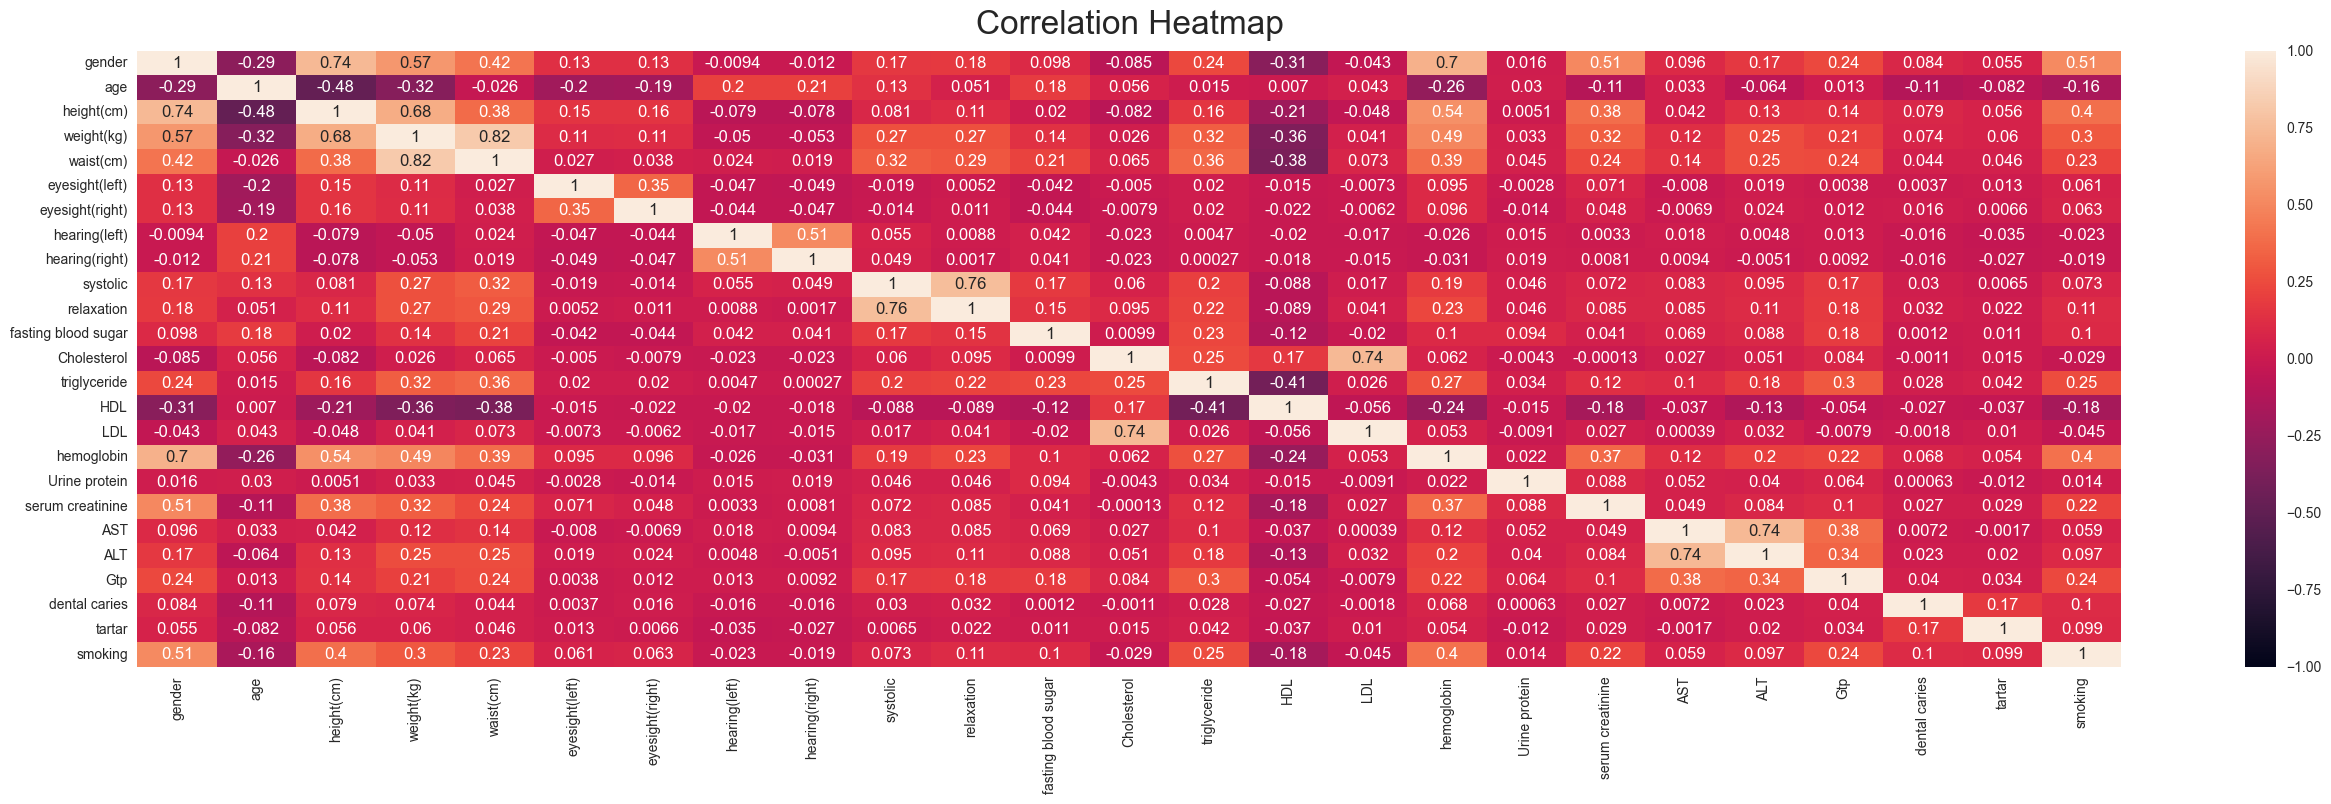

In [12]:
# Increase the size of the heatmap.
plt.figure(figsize=(32, 8))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12)

In [20]:
# In order to not have multicollinearity we drop the features that are highly correlated.
# If not, it could become difficult to determine the independent effect of each variable on the target variable.
corr_matrix = df.corr().abs() 
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))
print(high_corr_pairs)



[('height(cm)', 'gender'), ('waist(cm)', 'weight(kg)'), ('relaxation', 'systolic'), ('LDL', 'Cholesterol'), ('hemoglobin', 'gender'), ('ALT', 'AST')]


In [196]:
# We decided to drop columns: waist, relaxation, LDL, gender, AST to avoid multicollinearity problem 

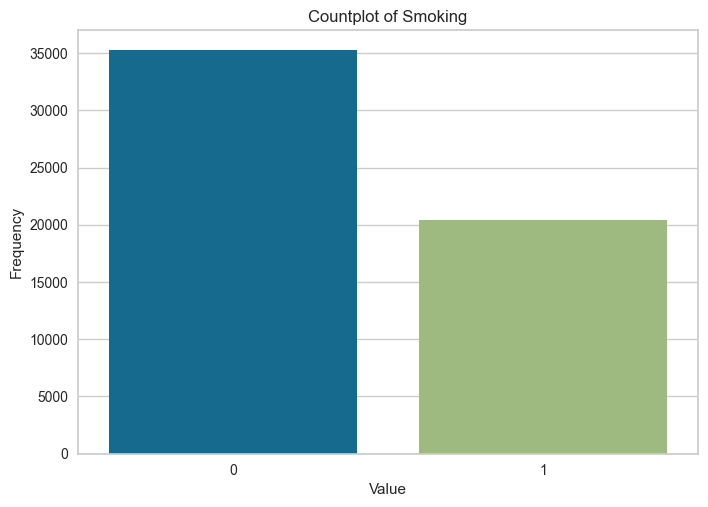

/var/folders/6t/n4lqh4yx1lx1b6qxwmbzqg680000gn/T/ipykernel_1038/4293015364.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['smoking'], shade=True)


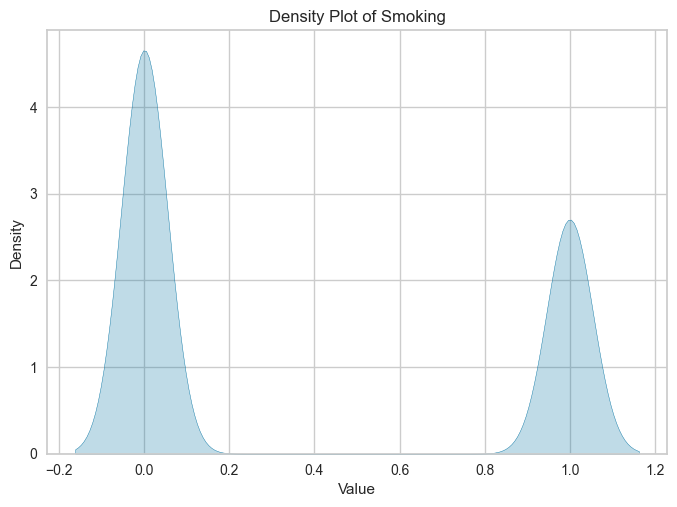

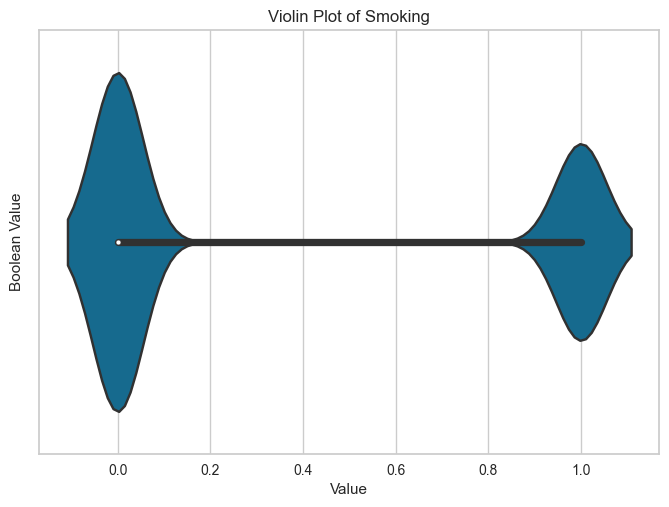

In [206]:
# Before applying any model we checked if our data is well balanced
sns.countplot(x='smoking', data=df)
plt.title('Countplot of Smoking')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# # Create a density plot of the data
# sns.kdeplot(df['smoking'], shade=True)
# plt.title('Density Plot of Smoking')
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.show()

# # Create a violin plot of the data
# sns.violinplot(x=df['smoking'])
# plt.title('Violin Plot of Smoking')
# plt.xlabel('Value')
# plt.ylabel('Boolean Value')
# plt.show()

#@TODO CREC QUE HAURIEM DE TENIR EN COMPTE DE CARA ALS MODELS QUE AIXÒ NO ESTÀ BALENCEJAT, ESCOLLIU EL GRAFIQUET QUE MES US AGRADI XD

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')


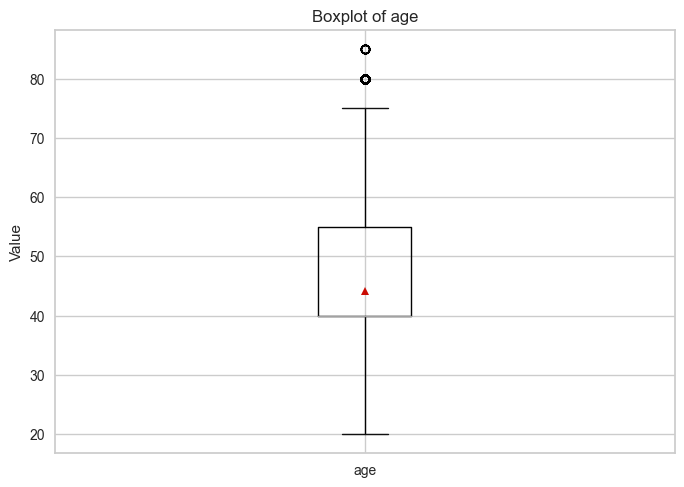

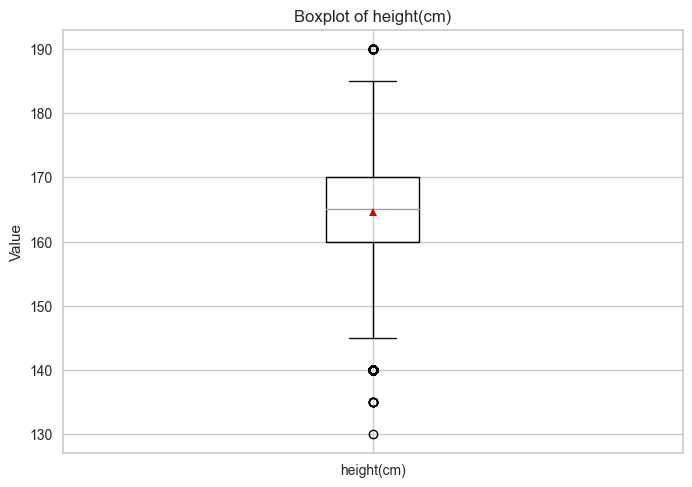

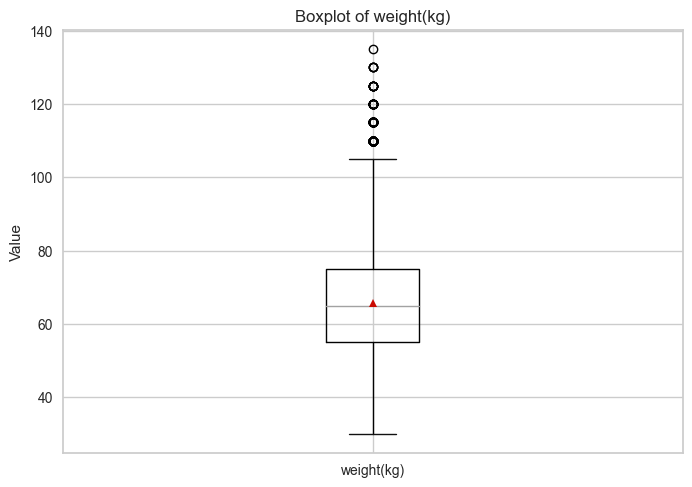

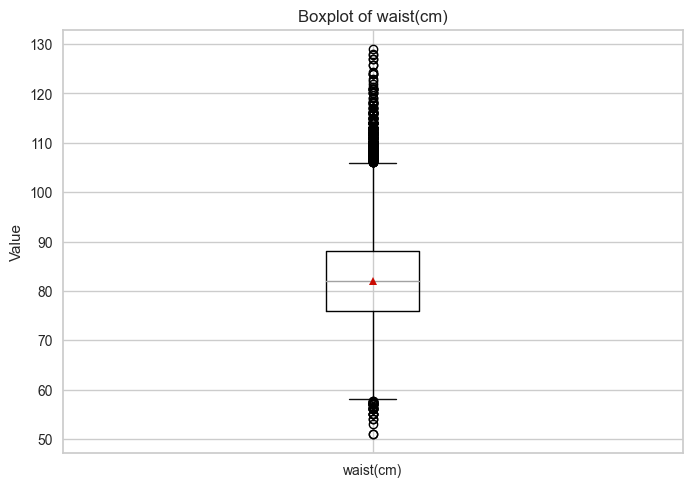

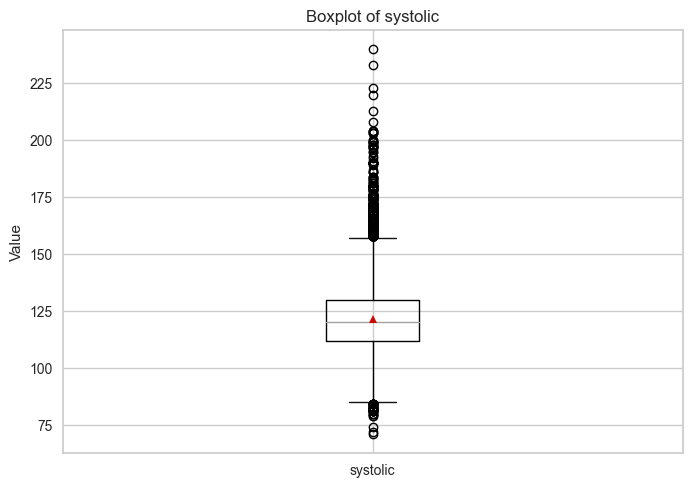

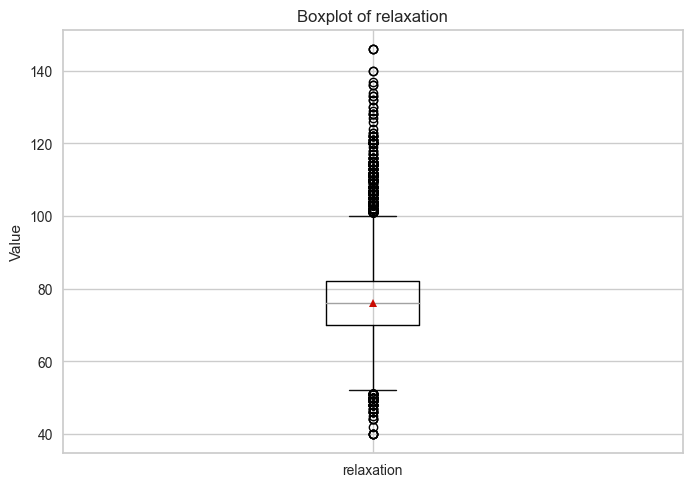

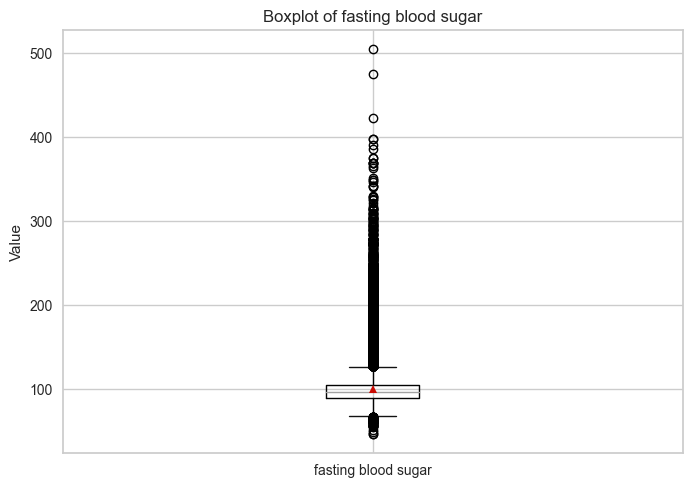

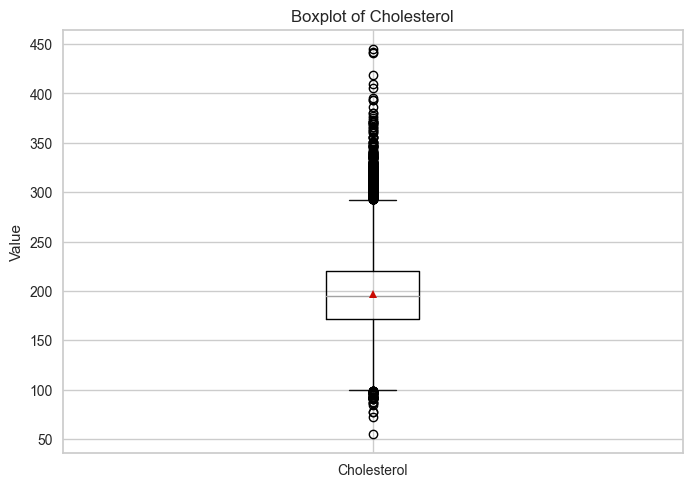

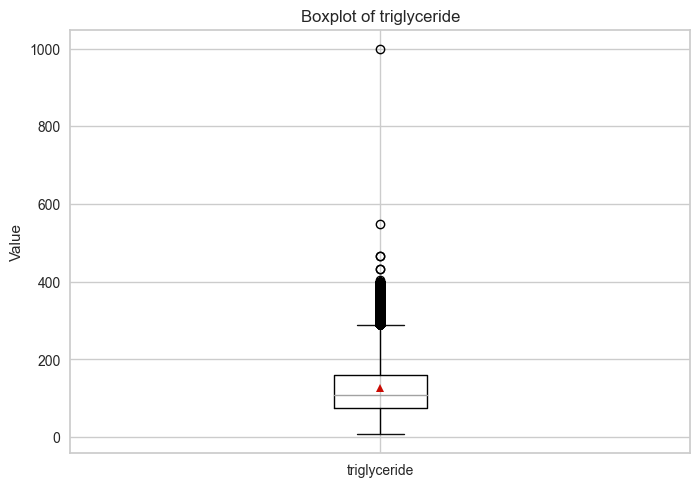

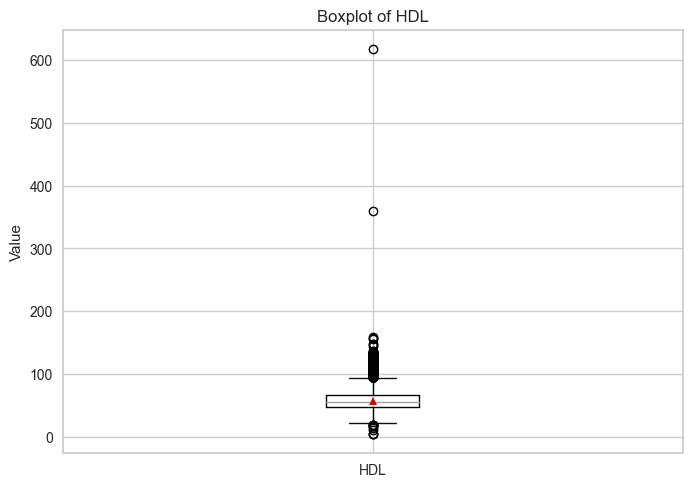

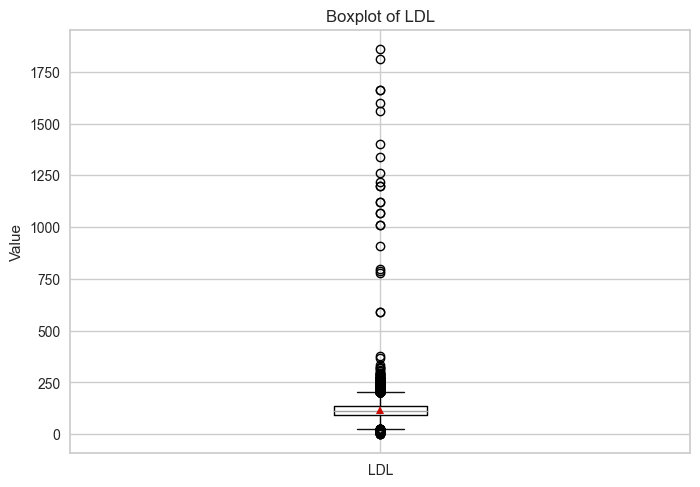

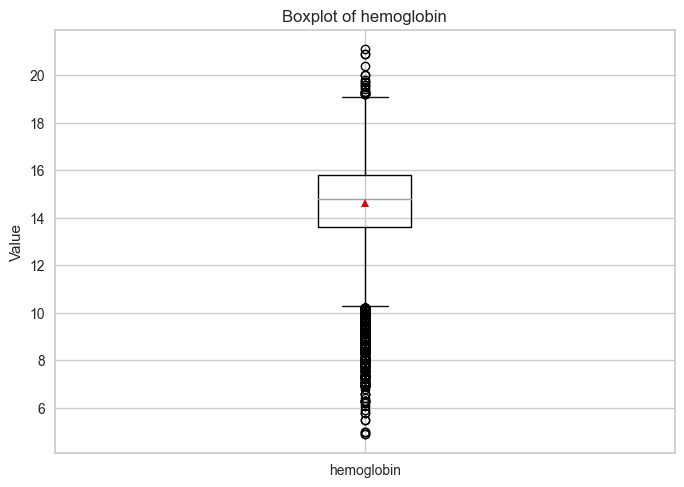

In [198]:
print(df.columns)
# Boxplots: jo faria:
cols1 = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)','systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol','triglyceride', 'HDL', 'LDL', 'hemoglobin']
for col in cols1:
    bx = df.boxplot(column=col, meanline=False, showmeans=True, return_type='dict')
    plt.title('Boxplot of ' + col)
    plt.ylabel('Value')
    plt.show()

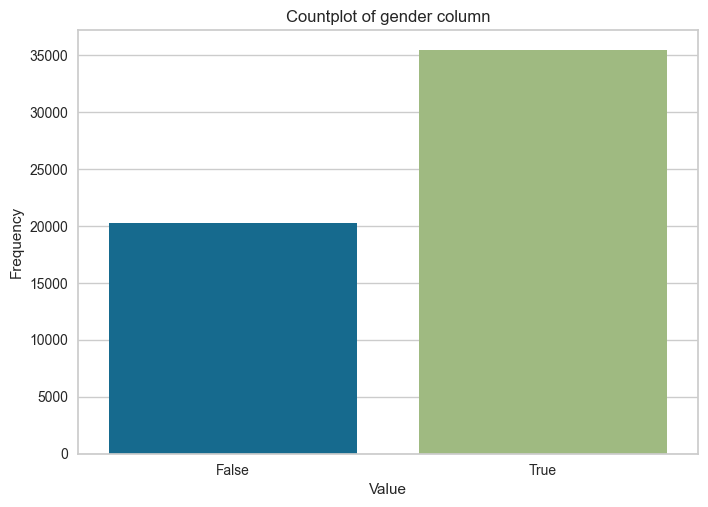

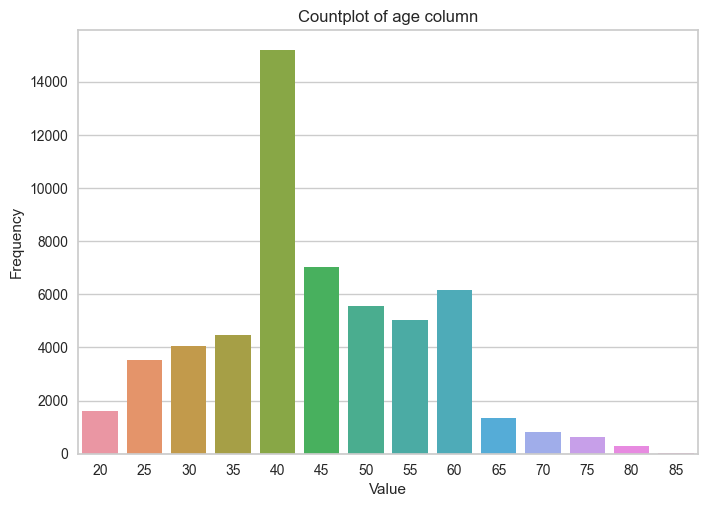

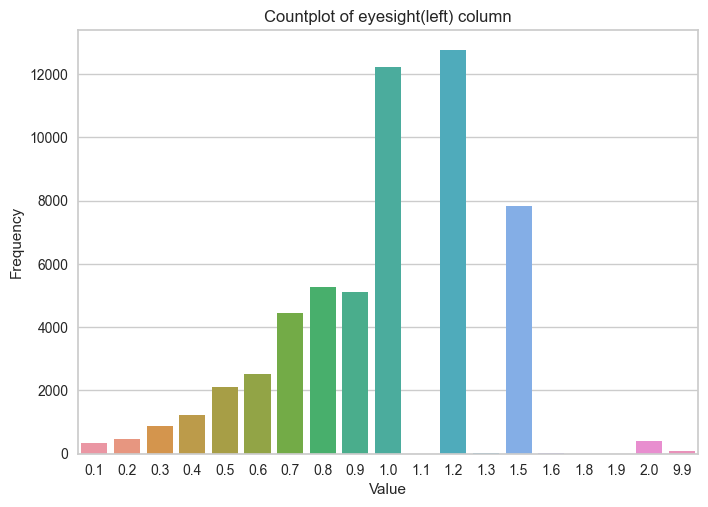

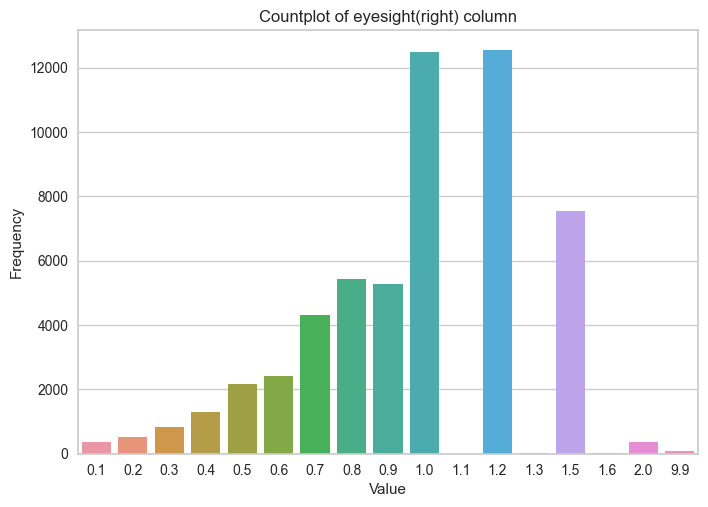

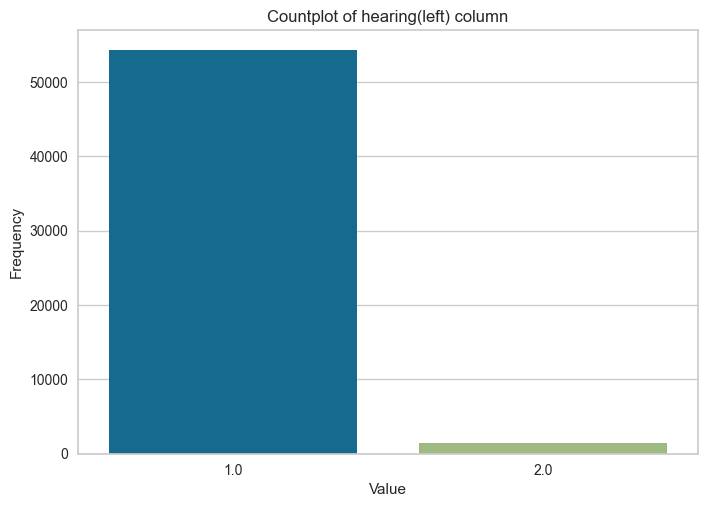

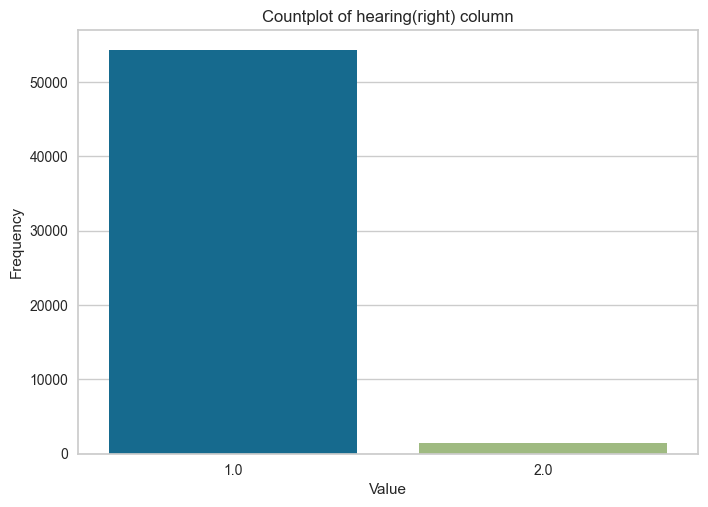

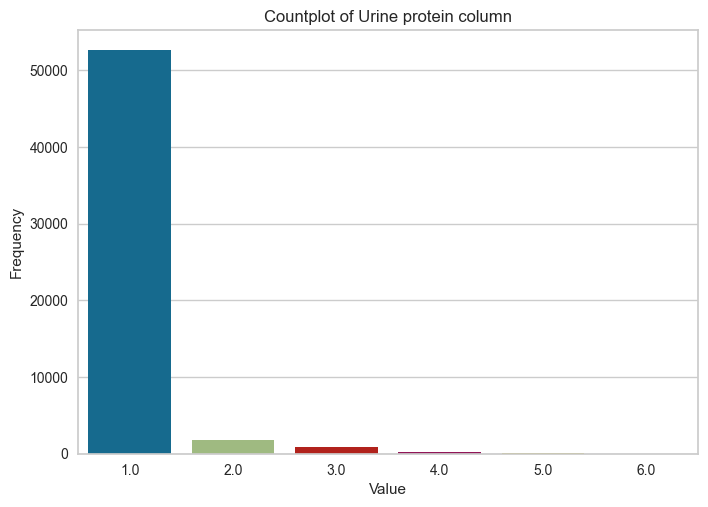

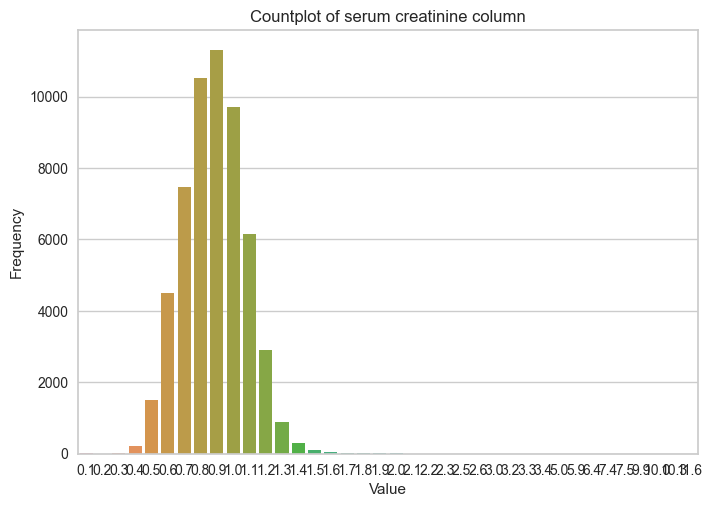

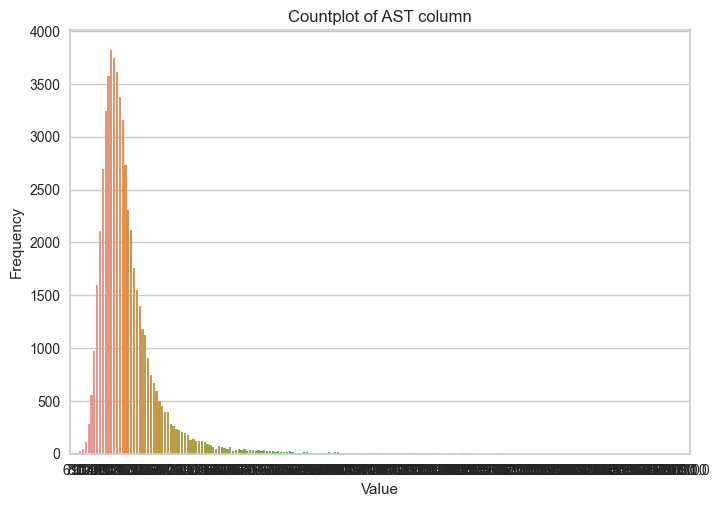

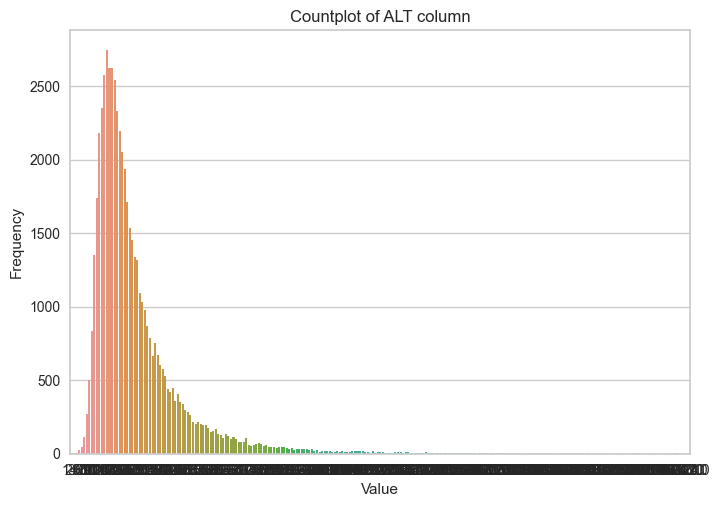

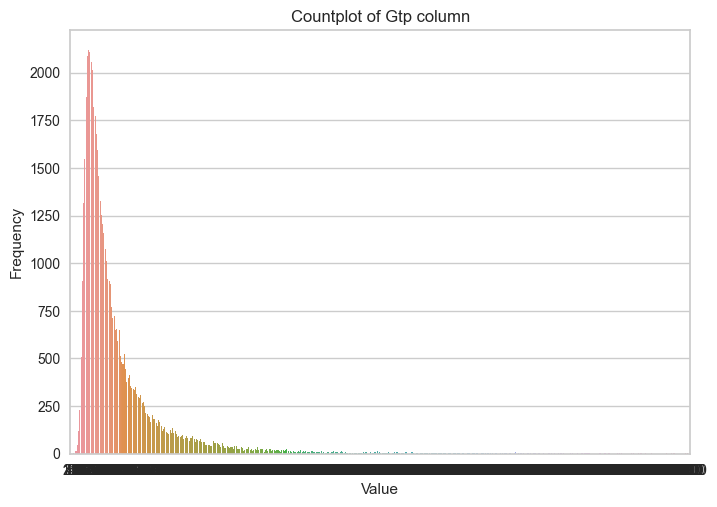

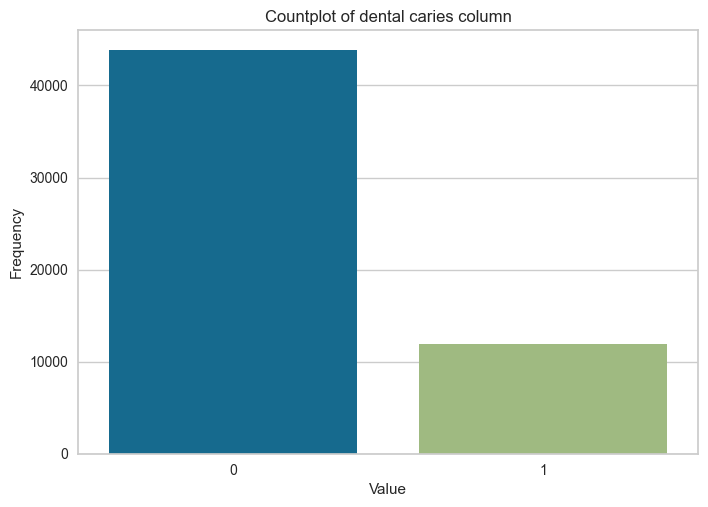

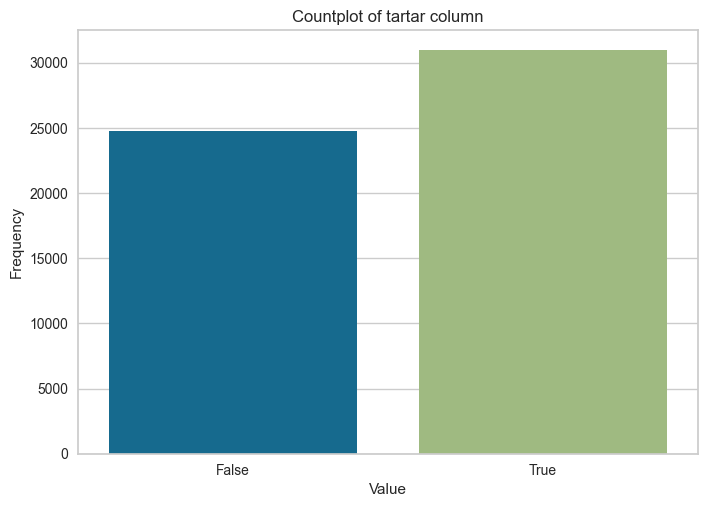

In [211]:
# Histograms 
#TODO # Mirar outliers i si cal fer un tractament (ex: eyesight left i rigth).
#TODO # Queratinine canviar el plot a density plot i ALT mirar quin fer
cols2 = ['gender','age', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'Urine protein','serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar']
for col in cols2:
    sns.countplot(x=col, data=df)
    plt.title('Countplot of ' + col +' column')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [226]:
# Identifying outliers
for col in df.columns:
    filtered_df = df[df[col] > df[col].mean() + 2 * df[col].std()]
    if not filtered_df.empty:
        print(f"{col} has outliers")

outliers_instances = (df[df.age > df.age.mean() + 2 * df.age.std()]).index.to_list

#TODO #Eliminar els outliers de:
# age has outliers
# height(cm) has outliers
# weight(kg) has outliers
# waist(cm) has outliers
# eyesight(left) has outliers
# eyesight(right) has outliers
# hearing(left) has outliers
# hearing(right) has outliers


age has outliers
height(cm) has outliers
weight(kg) has outliers
waist(cm) has outliers
eyesight(left) has outliers
eyesight(right) has outliers
hearing(left) has outliers
hearing(right) has outliers
systolic has outliers
relaxation has outliers
fasting blood sugar has outliers
Cholesterol has outliers
triglyceride has outliers
HDL has outliers
LDL has outliers
hemoglobin has outliers
Urine protein has outliers
serum creatinine has outliers
AST has outliers
ALT has outliers
Gtp has outliers


In [41]:
# Spliting dataset into train and test
from sklearn.model_selection import train_test_split
X = df.drop(columns=['smoking'], axis=1)
Y = df['smoking']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


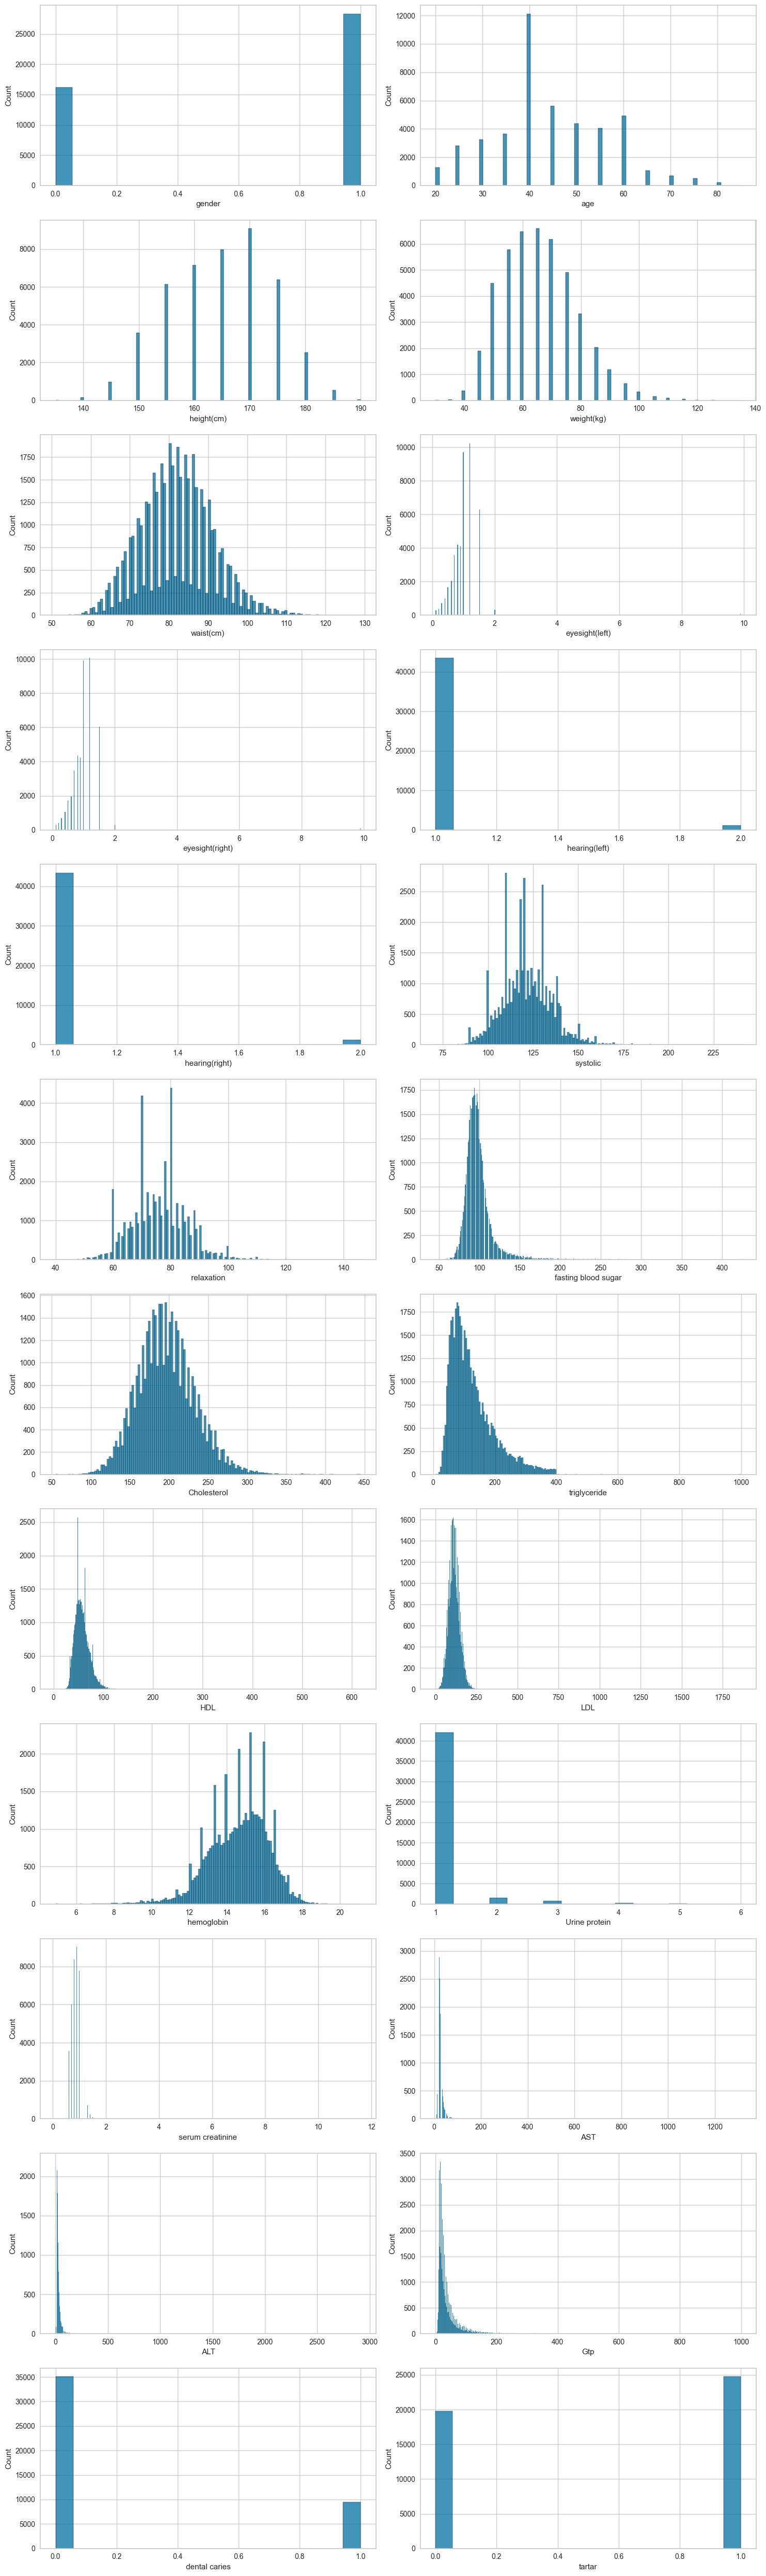

In [42]:
fig, axes = plt.subplots(12,2,figsize=(15,50))
X_train_frame = pd.DataFrame(X_train)
X_train_frame.columns=X.columns
for i, c in enumerate(X.columns):
    ax = axes.reshape(-1)[i]
    if X_train_frame[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=X_train_frame,ax=ax)
    else:
        b = sns.histplot(x=c,data=X_train_frame,ax=ax)
plt.tight_layout()

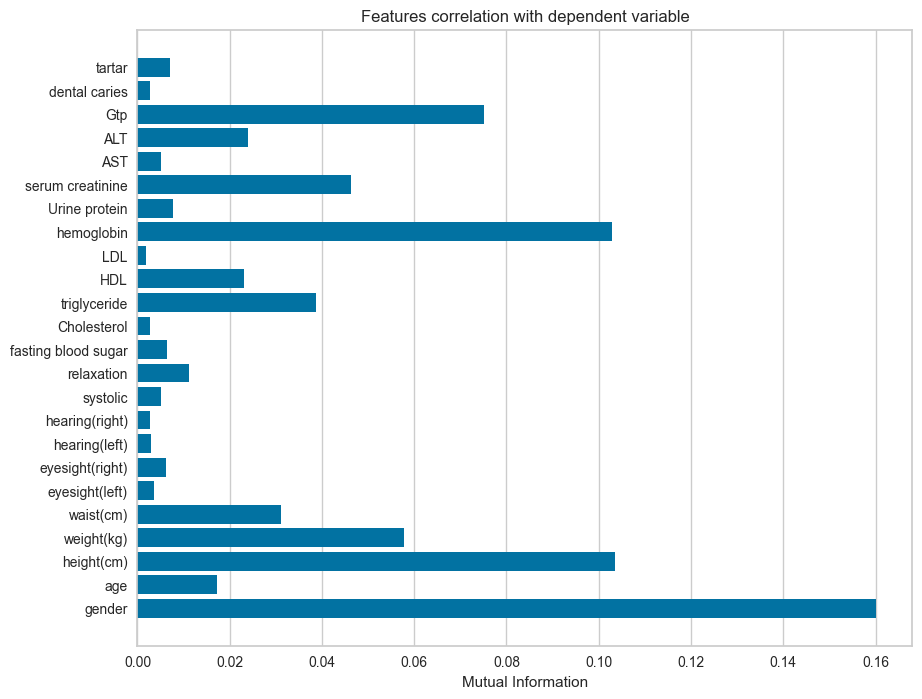

In [43]:
from yellowbrick.target.feature_correlation import feature_correlation
plt.figure(figsize=(10,8))
visualizer = feature_correlation(X_train, Y_train, labels=list(X_train.columns),method='mutual_info-classification');

In [44]:
## normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

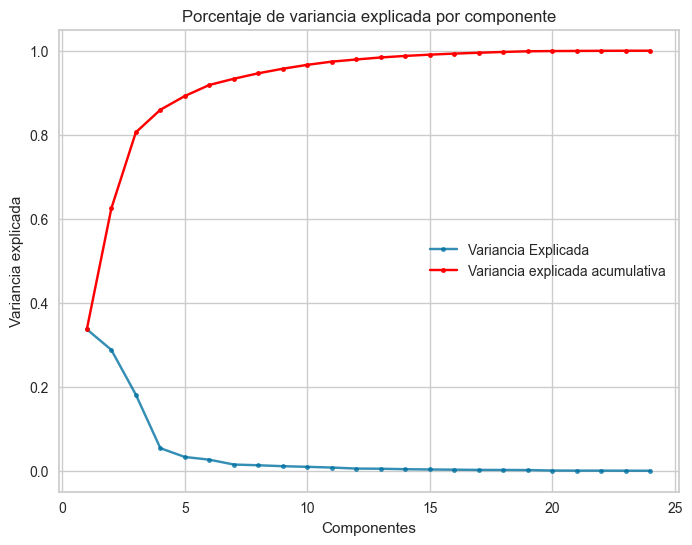

In [45]:
## permorm PCA
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_n)

fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

/usr/local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


<Axes: >

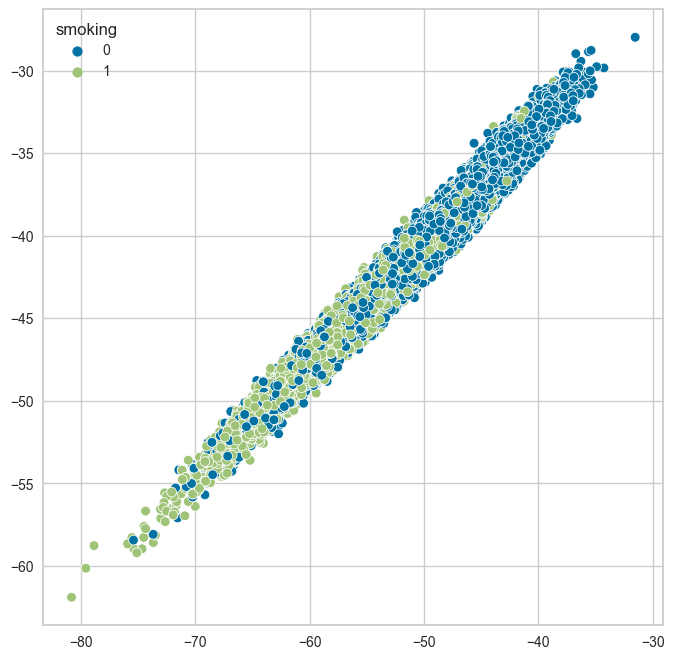

In [46]:
X_trans = pca.transform(X_train)
plt.figure(figsize=(8,8));
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=Y_train)